In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv(r"F:\omdena-mumbai-chapter-air-quality\src\tasks\task-1-data collection\aqi_data.csv")
df.head()

,Unnamed: 0,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,0,1661972400,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5
1,1,1661976000,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5
2,2,1661979600,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5
3,3,1661983200,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5
4,4,1661986800,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5


In [4]:
ndf = df.drop("Unnamed: 0", axis=1)
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,1661972400,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5
1,1661976000,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5
2,1661979600,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5
3,1661983200,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5
4,1661986800,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5


In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  4382 non-null   int64  
 1   CO        4382 non-null   float64
 2   NO        4382 non-null   float64
 3   NO2       4382 non-null   float64
 4   O3        4382 non-null   float64
 5   SO2       4382 non-null   float64
 6   PM2_5     4382 non-null   float64
 7   PM10      4382 non-null   float64
 8   NH3       4382 non-null   float64
 9   AQI       4382 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 342.5 KB


In [6]:
ndf['Datetime'] = pd.to_datetime(ndf['Datetime'], unit='s')

In [7]:
ndf['Time'] = ndf['Datetime'].dt.time
ndf['Datetime'] = ndf['Datetime'].dt.date

In [8]:
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI,Time
0,2022-08-31,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5,19:00:00
1,2022-08-31,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5,20:00:00
2,2022-08-31,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5,21:00:00
3,2022-08-31,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5,22:00:00
4,2022-08-31,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5,23:00:00


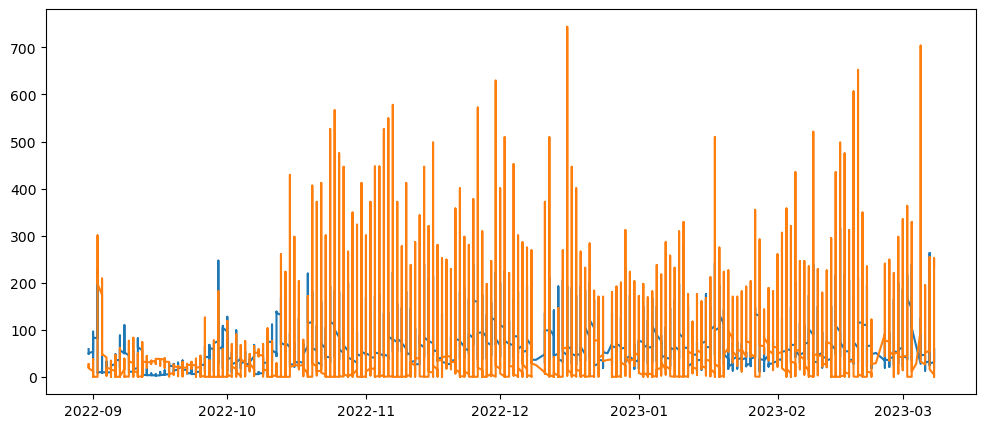

In [9]:
plt.figure(figsize=(12,5))
plt.plot(ndf['Datetime'], ndf['NO2'])
plt.plot(ndf['Datetime'], ndf['O3'])
plt.show()

In [10]:
mdf = ndf.groupby('Datetime')[['CO','NO','NO2','O3','SO2','PM2_5','PM10','NH3','AQI']].mean()
mdf.head()

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
Datetime,,,,,,,,,
2022-08-31,1097.488000,0.024000,52.50600,23.246000,57.698000,78.672000,102.698000,11.122000,5.000000
2022-09-01,1562.673750,32.767917,68.31625,6.168750,105.262917,113.057500,135.180000,12.995000,4.833333
2022-09-02,1853.903333,27.811250,78.54125,123.232917,118.662500,284.154583,308.989583,3.785417,5.000000
2022-09-03,702.063750,0.275833,17.05125,118.047500,19.942500,71.196250,79.616250,4.355833,4.583333
2022-09-04,588.993333,4.360417,18.65000,14.433333,20.519167,22.301667,34.551250,7.525000,2.458333


In [15]:
mdf.corr()

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
CO,1.000000,0.515822,0.954672,0.509769,0.730813,0.937472,0.950842,0.847271,0.666599
NO,0.515822,1.000000,0.524564,-0.155661,0.648480,0.352483,0.361525,0.489479,0.261796
NO2,0.954672,0.524564,1.000000,0.442040,0.832083,0.901260,0.907901,0.780467,0.690131
O3,0.509769,-0.155661,0.442040,1.000000,0.302229,0.617283,0.621817,0.423276,0.570345
SO2,0.730813,0.648480,0.832083,0.302229,1.000000,0.719770,0.712862,0.548258,0.678794
PM2_5,0.937472,0.352483,0.901260,0.617283,0.719770,1.000000,0.996796,0.682175,0.652096
PM10,0.950842,0.361525,0.907901,0.621817,0.712862,0.996796,1.000000,0.720461,0.667698
NH3,0.847271,0.489479,0.780467,0.423276,0.548258,0.682175,0.720461,1.000000,0.628551
AQI,0.666599,0.261796,0.690131,0.570345,0.678794,0.652096,0.667698,0.628551,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


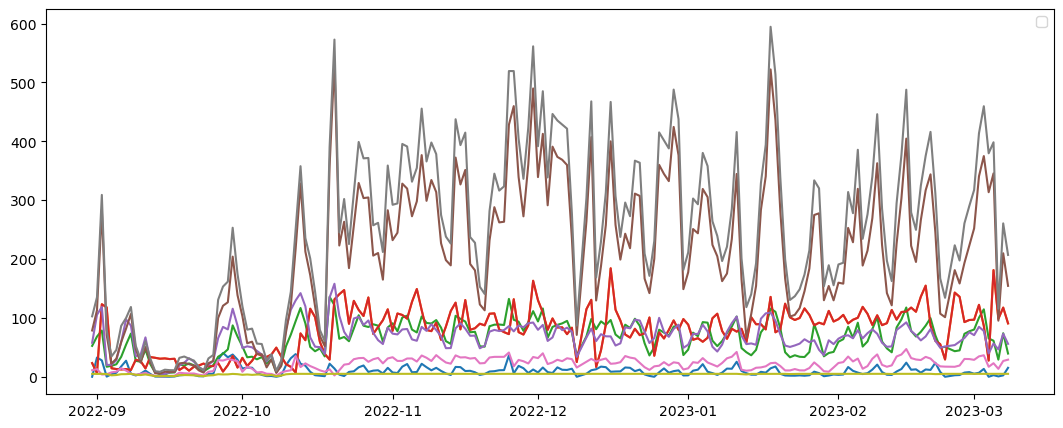

In [11]:
plt.figure(figsize=(13,5))
plt.plot(mdf.index, mdf['NO'])
plt.plot(mdf.index, mdf['O3'])
plt.plot(mdf.index, mdf['NO2'])
plt.plot(mdf.index, mdf['O3'])
plt.plot(mdf.index, mdf['SO2'])
plt.plot(mdf.index, mdf['PM2_5'])
plt.plot(mdf.index, mdf['NH3'])
plt.plot(mdf.index, mdf['PM10'])
plt.plot(mdf.index, mdf['AQI'])
plt.legend()
plt.show()

In [12]:
mean_list = mdf.mean().to_list()
sd_list = mdf.std().to_list()
col_list = mdf.columns.to_list()

# define scaling function
def scaling_func(row):
    row.CO = (row.CO - mean_list[0])/sd_list[0]
    row.NO = (row.NO - mean_list[1])/sd_list[1]
    row.NO2 = (row.NO2 - mean_list[2])/sd_list[2]
    row.O3 = (row.O3 - mean_list[3])/sd_list[3]
    row.SO2 = (row.SO2 - mean_list[4])/sd_list[4]
    row.PM2_5 = (row.PM2_5 - mean_list[5])/sd_list[5]
    row.PM10 = (row.PM10 - mean_list[6])/sd_list[6]
    row.NH3 = (row.NH3 - mean_list[7])/sd_list[7]
    row.AQI = (row.AQI - mean_list[8])/sd_list[8]
    return row

In [13]:
sdf = mdf.apply(scaling_func, axis='columns')

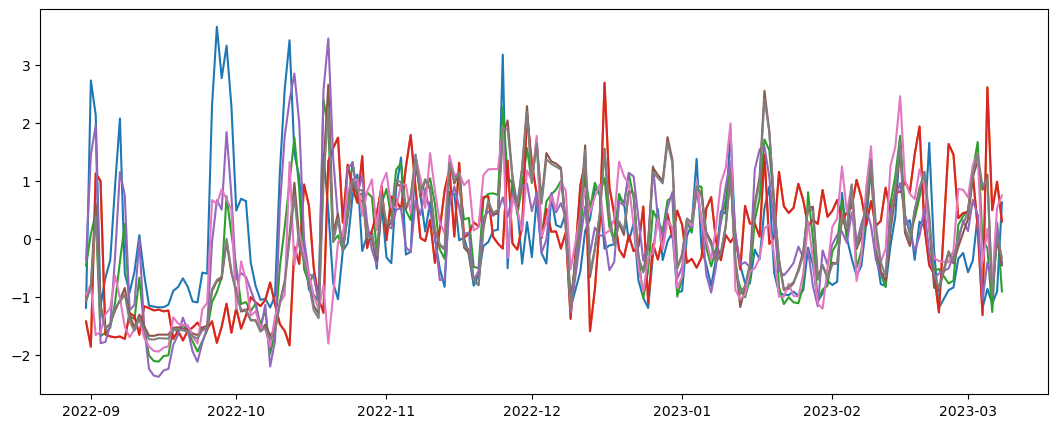

In [14]:
plt.figure(figsize=(13,5))
plt.plot(sdf.index, sdf['NO'])
plt.plot(sdf.index, sdf['O3'])
plt.plot(sdf.index, sdf['NO2'])
plt.plot(sdf.index, sdf['O3'])
plt.plot(sdf.index, sdf['SO2'])
plt.plot(sdf.index, sdf['PM2_5'])
plt.plot(sdf.index, sdf['NH3'])
plt.plot(sdf.index, sdf['PM10'])
plt.show()